In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

%matplotlib inline

In [ ]:

sample = np.load('./out/exp/measure.npy')

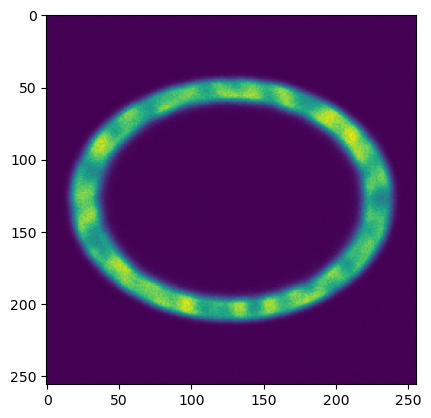

In [13]:
image = sample[0, 128]
plt.imshow(image)


In [115]:
def dwt_process(image, threshold=100, level=None, wavelet='bior4.4', mode='periodic', drop_hi=1, drop_lo=True, get_slices=False):
    wave = pywt.wavedec2(image, wavelet, mode, level)

    if drop_hi > 0:
        wave = wave[:-drop_hi]
    if drop_lo:
        wave[0] *= 0
    
    wave, slices = pywt.coeffs_to_array(wave)

    if threshold > 0:
        wave = pywt.threshold(wave, threshold)

    if get_slices:
        return wave, slices
    else:
        return wave

In [119]:

wimage  = dwt_process(sample, drop_hi=2)
print(wimage.shape)

: 

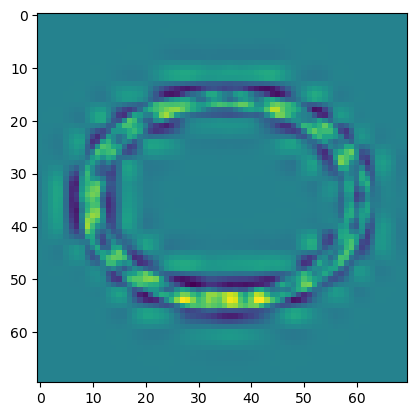

In [118]:
wimage, wslices = dwt_process(image,get_slices=True, drop_hi=2)

coeffs = pywt.array_to_coeffs(wimage, wslices, output_format='wavedec2')

rimage = pywt.waverec2(coeffs, 'bior4.4')

plt.imshow(rimage)